In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
# Extracting single image.
single_image = x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

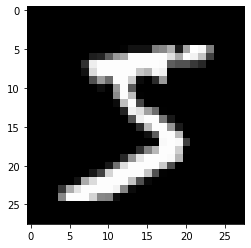

In [8]:
plt.imshow(single_image, cmap = 'gray');

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_train.shape

(60000,)

In [11]:
# Now we have to convert to one hot encoding.
from keras.utils.np_utils import to_categorical

In [13]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [14]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

So we see it has been converted to one hot encoding.

In [15]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
# Now we will be processing the x_data.

In [17]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

We see that it hasn't been normalized..so we will do that first.

In [18]:
single_image.max()

255

In [22]:
# Normalizing.
x_train = x_train/ x_train.max()
x_test = x_test/ x_test.max()

In [23]:
scaled_image = x_train[0]

In [25]:
scaled_image.max()

1.0

Now we see that the max value comes out to be one.

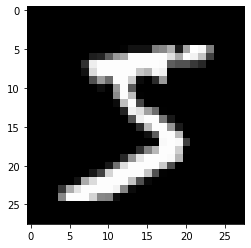

In [27]:
plt.imshow(scaled_image, cmap = 'gray');

In [28]:
x_train.shape

(60000, 28, 28)

In [29]:
# Here we will have to reshape it...that is we will be adding the color channel.

In [30]:
x_train = x_train.reshape(60000, 28, 28,1)

In [32]:
x_test = x_test.reshape(10000, 28, 28,1)

In [34]:
x_test.shape

(10000, 28, 28, 1)

In [35]:
# Building and training the model.

In [36]:
from keras.models import Sequential

In [37]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [39]:
# Creating the model.
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (28,28,1),
                activation = 'relu'))

# PULLING LAYER
model.add(MaxPool2D(pool_size = (2,2)))

# Transform the convolutional layer and pulling layer
# into something that a dense layer can understand.
# So we do flattening.
# we are going from 2-D---> 1-D.
model.add(Flatten())

# DENSE LAYER
model.add(Dense(128,activation = 'relu'))

# OUTPUT LAYER
model.add(Dense(10, activation = 'softmax'))

# COMPILING THE MODEL.
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [41]:
# GIVES THE SUMMARY OF THE MODEL.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(x_train, y_cat_train, epochs = 2)

Epoch 1/2
60000/60000 [==============================] - 50s 833us/step - loss: 0.1375 - accuracy: 0.9576
Epoch 2/2
60000/60000 [==============================] - 39s 648us/step - loss: 0.0495 - accuracy: 0.9860


In [44]:
model.metrics_names

['loss', 'accuracy']

In [45]:
# NOW WE WILL GRAB AND EVALUATE THE MODE.
model.evaluate(x_test, y_cat_test)

10000/10000 [==============================] - 2s 180us/step


[0.04080316533618607, 0.9850000143051147]

**So loss is 0.04 and accuracy is 98%**

In [46]:
# Now we will enter a input and check its predictions.
from sklearn.metrics import classification_report

In [47]:
predictions = model.predict_classes(x_test)

In [48]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [49]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [54]:
# Here we take y_test and not y_cat_test because as we see above the 
# predictions given above are in the y_test format and not in one hot encoding.

print(classification_report(y_test, predictions))

# The arguments are the two to be compared.

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.99      0.98     10000
weighted avg       0.99      0.98      0.98     10000

